In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import re
import random
import scipy
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
import sklearn.model_selection as skl_ms

In [2]:
my_data = np.genfromtxt('../Data2/Test_Data.txt', delimiter=',',  dtype='int')
my_data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   4, 111, 17

In [3]:
type(my_data)

numpy.ndarray

In [4]:
(A_train, A_test) = skl_ms.train_test_split(my_data)

In [5]:
type(A_train)

numpy.ndarray

In [6]:
A_test.shape

(2500, 784)

In [7]:
my_data.shape

(10000, 784)

In [8]:
def kmeans(data, targets, k=10, iters=4,plotdata=None):

    # good initial centroids found upon inspection
    #centroid_indices = np.array([136,130,0])
    #centroid_indices = np.array([63, 53, 48])


    # Comment the above line and uncoment the line below to
    # chooses k random different points from the dataset as intitial centroids

    centroid_indices = random.sample(range(data.shape[0]),k)
    print(centroid_indices)
    centroids =  np.array([data[i] for i in centroid_indices])

    for it in range(iters):
        centroids, classes = compute_centroids(data, centroids)
        plotme(plotdata,classes, centroids, iter=it+1)
        print(classes)
    #plotme(plotdata, targets, centroids, legends=True, clear = True)
    #plt.savefig("classes-known.jpg")
    plt.pause(4)
    plotme(plotdata, classes, iter="Final", clear = True)
    return classes

In [9]:
def euclidian(x1,x2):
    return np.sqrt(sum(np.square(x1-x2)))

def getclass(datapoint, centroids):
    distances = np.array([euclidian(datapoint, centroid) for centroid in centroids])
    return np.argmin(distances)


def compute_centroids(data, centroids):
    classes = np.zeros(data.shape[0])
    # assign each data point to closest centroid
    for i in range(len(data)):
        classes[i] = getclass(data[i], centroids)

    new_centroids = np.ndarray(centroids.shape)

    for i in range(len(centroids)):
        new_centroids[i] = np.mean(data[classes==i],axis=0)


    return new_centroids, classes

def plotme(data, target, centroids=[], legends=False, iter=None,clear=False):
    colors=  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    if clear:
        plt.clf() # Draw the plot each iteration

    # Ref: http://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-clusters-in-a-k-means-unsupervised-learning-model/
    class_1 = data[target==0]
    class_2 = data[target==1]
    class_3 = data[target==2]
    class_4 = data[target==3]
    class_5 = data[target==4]
    class_6 = data[target==5]
    class_7 = data[target==6]
    class_8 = data[target==7]
    class_9 = data[target==8]
    class_10 = data[target==9]
    
    c1 = plt.scatter(class_1[:,0], class_1[:,1],c=colors[0],
            marker='o')	
    c2 = plt.scatter(class_2[:,0], class_2[:,1],c=colors[1],
            marker='o')
    c3 = plt.scatter(class_3[:,0], class_3[:,1],c=colors[2],
            marker='o')
    c4 = plt.scatter(class_4[:,0], class_4[:,1],c=colors[3],
            marker='o')	
    c5 = plt.scatter(class_5[:,0], class_5[:,1],c=colors[4],
            marker='o')
    c6 = plt.scatter(class_6[:,0], class_6[:,1],c=colors[5],
            marker='o')
    c7 = plt.scatter(class_7[:,0], class_7[:,1],c=colors[6],
            marker='o')	
    c8 = plt.scatter(class_8[:,0], class_8[:,1],c=colors[7],
            marker='o')
    c9 = plt.scatter(class_9[:,0], class_9[:,1],c=colors[8],
            marker='o')
    c10 = plt.scatter(class_10[:,0], class_10[:,1],c=colors[9],
            marker='o')
    

    if centroids!=[]:
        plt.scatter(centroids[:,0],centroids[:,1],c='k',marker='x',s= 150)

    plt.title('Iris dataset with 3 clusters and unknown outcomes : Iter '+str(iter))

    plt.pause(1)


In [10]:
#data = my_data.values.tolist()
pca = PCA(n_components=2).fit(my_data)
pca_2d = pca.transform(my_data)
pca_2d

array([[ 177.92262027, -646.31301144],
       [ 695.5088143 , -233.36728669],
       [-765.17917033, -315.92997182],
       ...,
       [ -75.46319435, -697.06890324],
       [-642.44052212,  -39.697429  ],
       [1163.7168104 ,  416.29945063]])

[4883, 1939, 2596, 2348, 6047, 381, 3, 425, 7321, 5496]


C:\Users\willa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:62: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


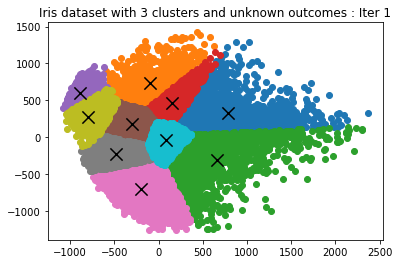

[2. 2. 7. ... 6. 7. 0.]


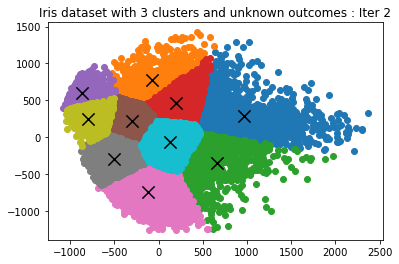

[6. 2. 7. ... 6. 7. 0.]


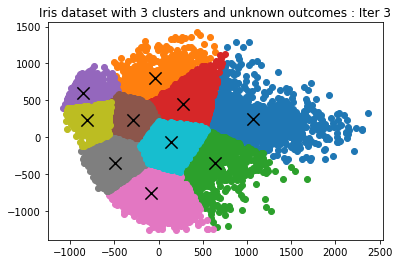

[6. 2. 7. ... 6. 7. 0.]


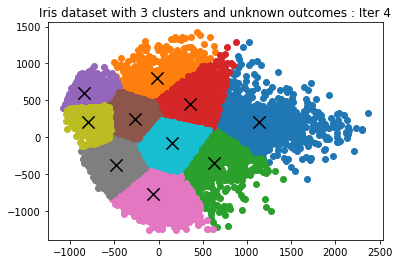

[6. 2. 7. ... 6. 8. 0.]


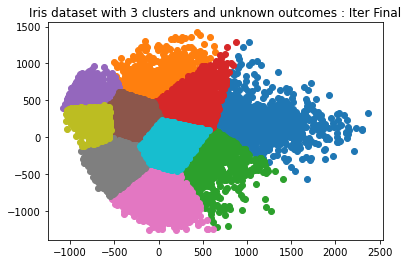

In [11]:
plt.ion() # Interactive on
target = np.array([0,1,2,3,4,5,6,7,8,9])
y = kmeans(pca_2d, target, k=len(np.unique(target)), plotdata=pca_2d)

In [17]:
#type(y)
y = y.astype(np.int)
y[:100]

array([6, 2, 7, 7, 9, 9, 9, 6, 4, 0, 6, 6, 8, 6, 8, 4, 9, 1, 0, 6, 7, 6,
       8, 9, 6, 0, 2, 1, 6, 6, 6, 8, 0, 1, 7, 3, 6, 6, 3, 7, 6, 9, 7, 8,
       7, 3, 9, 3, 7, 1, 1, 7, 4, 6, 3, 5, 6, 7, 6, 6, 9, 9, 8, 9, 9, 4,
       6, 1, 8, 5, 3, 4, 3, 0, 3, 4, 7, 2, 4, 0, 2, 0, 3, 7, 3, 9, 7, 7,
       4, 3, 6, 5, 0, 3, 6, 6, 3, 4, 0, 0])

In [18]:
type(y)

numpy.ndarray

In [19]:
np.savetxt(r'../Data2/out.txt',y,fmt='%d')